# Clustering an PCA - recitation

``
In this recitation, you will experience with implementing linear two clustering models: KMeans and DBSCAN. You will also implement a linear decomposition algorithm, PCA.
``

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

``
Start by generatig data and visualise it. Try to pick an insteresting looking dataset.
``

In [2]:
NUM_SAMPLES = 500
data, labels = make_blobs(n_samples=NUM_SAMPLES, centers=3)

``
Plot the generated data
``

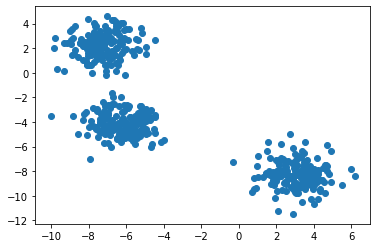

In [3]:
plt.scatter(data[:, 0], data[:, 1])

In [4]:
def plot_clusters(clusters_points):
    """A utility function that plots each cluster in a different color"""
    fig = plt.figure()
    for cluster_points in clusters_points:
        cluster_points = np.array(cluster_points)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
    return fig

# KMeans


``
Implement the KMeans algorithm. Use wikipedia and google if you aren't sure what to do.
``

In [5]:

def get_closest_center(point, centers):
    """Given a point and a list of centers, this function returns the closest center to the point."""
    center_distance = np.linalg.norm(point - centers, axis=1)
    closest_center = np.argmin(center_distance)
    return closest_center

def kmeans(data, clusters_num, eps=1e-8):
    """A function implementing KMeans.
    
    Gets as input the data (data), wanted number of clusters (clusters_num), 
    and a converagence parameter (eps).
    
    Returns a list of clusters, each is a list of points (cluster_points), and the center of each cluster (centers). 
    """
    center_inds = np.random.choice(data.shape[0], clusters_num)
    centers = data[center_inds]
    delta_centers = 2*eps
    counter = 0
    new_centers = np.array(centers)
    while delta_centers > eps:
        cluster_points = [[] for i in range(clusters_num)]
        for point in data:
            closest_center = get_closest_center(point, centers)
            cluster_points[closest_center].append(point)
        for i in range(clusters_num):
            new_centers[i] = np.mean(np.array(cluster_points[i]), axis=0)
        delta_centers = np.max(np.linalg.norm(new_centers - centers))
        centers = np.array(new_centers)
        counter += 1
    return cluster_points, centers

``
Plot your results
``

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

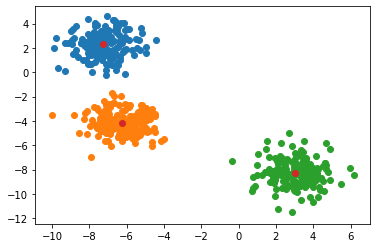

In [6]:
cluster_points, centers = kmeans(data, 3)
fig = plot_clusters(cluster_points)
plt.scatter(centers[:, 0], centers[:, 1]) # Also plots the centers of the clusters.
fig.show

# DBSCAN

``
Implement the DBSCAN algorithm. Again, use wikipedia and google if you aren't sure what to do.
``

In [7]:
def get_neighbors(point, data, eps):
    """Given a point, this function returns a list of all the 
    points that are closer than 'eps' to it.
    """
    distances = np.linalg.norm(data[point] - data, axis=1)
    neighbors = np.nonzero(distances < eps)[0]
    return list(neighbors)

def dbscan(data, eps, min_points=1):
    """A function implementing DBScan.
    
    Gets as input the data (data), the maximal neighbor distance (eps), 
    and the minimum number of points in a cluster (min_points).
    
    Returns a list of labels for each point in tha data (labels). 
    """
    labels = np.zeros(data.shape[0])
    cluster_counter = 0
    for point in range(data.shape[0]):
        if labels[point] > 0:
            continue
        neighbors = get_neighbors(point, data, eps)
        if len(neighbors) <= min_points:
            labels[point] = -1
        else:
            cluster_counter += 1
            labels[point] = cluster_counter
            neighbors.remove(point)
            seed = neighbors
            while seed:
                point = seed[0]
                seed.remove(point)
                if labels[point] > 0:
                    continue
                labels[point] = cluster_counter
                neighbors = get_neighbors(point, data, eps)
                seed += [x for x in neighbors if labels[x] <= 0 and x not in seed]
    return labels

``
Plot your results
``

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

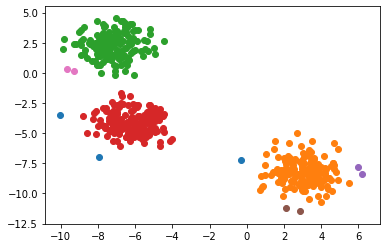

In [8]:
labels = dbscan(data, 1, 1)
clusters_points = []
for label in np.unique(labels):
    clusters_points.append(data[labels==label])
fig = plot_clusters(clusters_points)
fig.show

# PCA

``
Read about PCA and it's relation to the SVD algorithm. a good source can be found here: https://intoli.com/blog/pca-and-svd/.
In this section we will implement a simple version of PCA wehre you calculate all of the compomemts.

Don't forget to first change the mean of your data to 0.
``

In [9]:
def pca(data):
    """A function implementing PCA.
    
    Gets as input the data (data).
    
    Returns the data after the pca transformation (transformed_data), 
    and the components in the previous basis (components). 
    """
    data -= data.mean(axis=0)
    u, s, vh = np.linalg.svd(data)
    components = vh.transpose()
    transformed_data = data @ vh
    return transformed_data, components

``
Plot your results
``

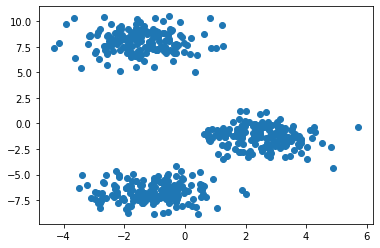

In [10]:
transformed_data, components = pca(data)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

``
Compare with sklearn.decomposition.PCA
``

In [11]:
from sklearn.decomposition import PCA

In [12]:
sk_pca = PCA()
sk_pca.fit(data)
sk_pca.components_, components

(array([[ 0.7339295 , -0.67922565],
        [-0.67922565, -0.7339295 ]]), array([[-0.7339295 , -0.67922565],
        [ 0.67922565, -0.7339295 ]]))